In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import random

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image

# Importing the dataset

In [3]:
train_path = os.getcwd() + '\\train'
test_path = os.getcwd() + '\\test'

**os.getcwd() -> To get the current working directory.**

## To see the folders inside the train path

In [4]:
print("Folders in Train path: ", os.listdir(train_path))
print("Folders in Test path: ", os.listdir(test_path))

Folders in Train path:  ['Dark', 'Green', 'Light', 'Medium']
Folders in Test path:  ['Dark', 'Green', 'Light', 'Medium']


## Extracting 5 images in each folders from the train set and test set to have a quick peek at our images

In [5]:
def plot_sample_images(folder_path, no_of_samples = 5, figsize = (30, 5)):
    
    # Folder names are stored here
    folder_names = os.listdir(folder_path)
    
    # Iterating through each folder
    for folder_name in folder_names:
        images_path = folder_path + '\\' + folder_name
        
        # Making a subplot for each folder and pulling specified number of images. (Number of images you want to look and figsize can be defined by user as well)
        fig, ax = plt.subplots(1, no_of_samples, figsize = figsize)
        plt.suptitle("Coffee beans belong to " + folder_name)
        
        # Iterating through the folder and printing n number of samples
        for image_num in range(no_of_samples):
            
            # Selecting a random image from the images
            random_image_name = random.choice(os.listdir(images_path))
            
            # Returns the image matrix (Since the images are read as metrics consisting of pixel values)
            image_matrix = plt.imread(images_path + '\\' + random_image_name)
            
            # imshow() is used to view an image using image matrix
            ax[image_num].imshow(image_matrix)
            
            # Giving title to each image in subplots
            ax[image_num].set_title(random_image_name)

### Samples images from training set

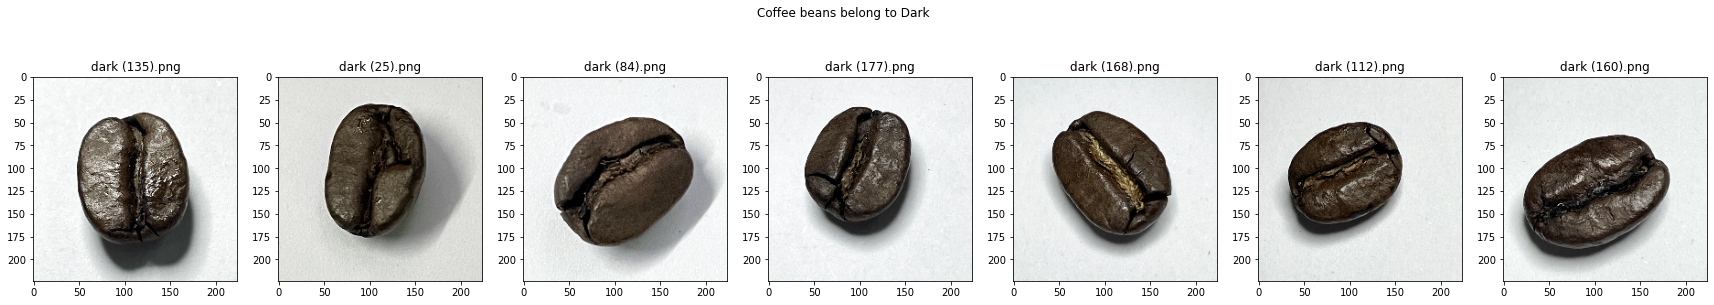

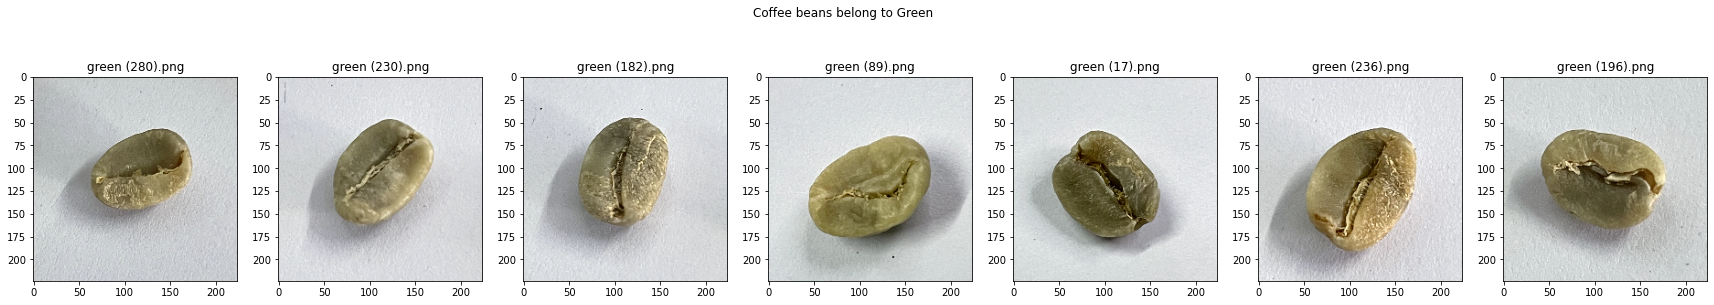

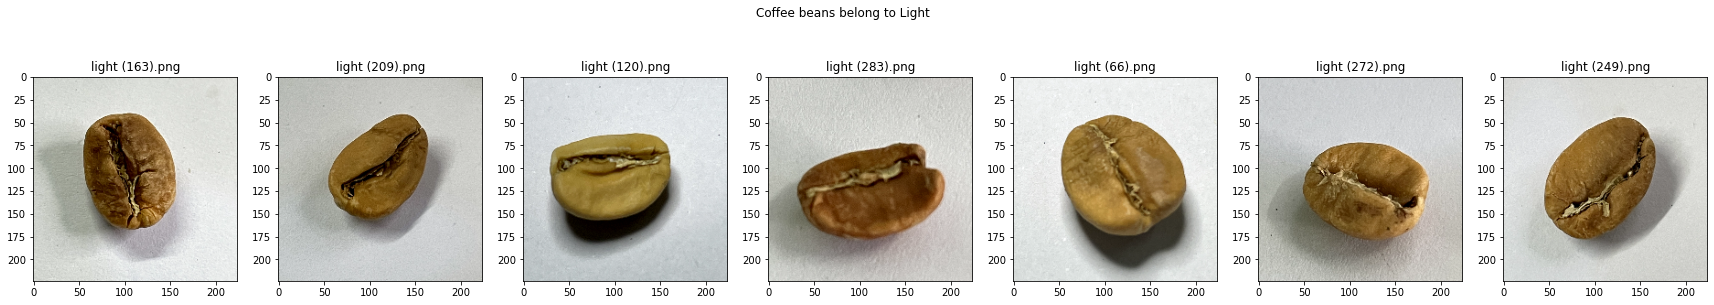

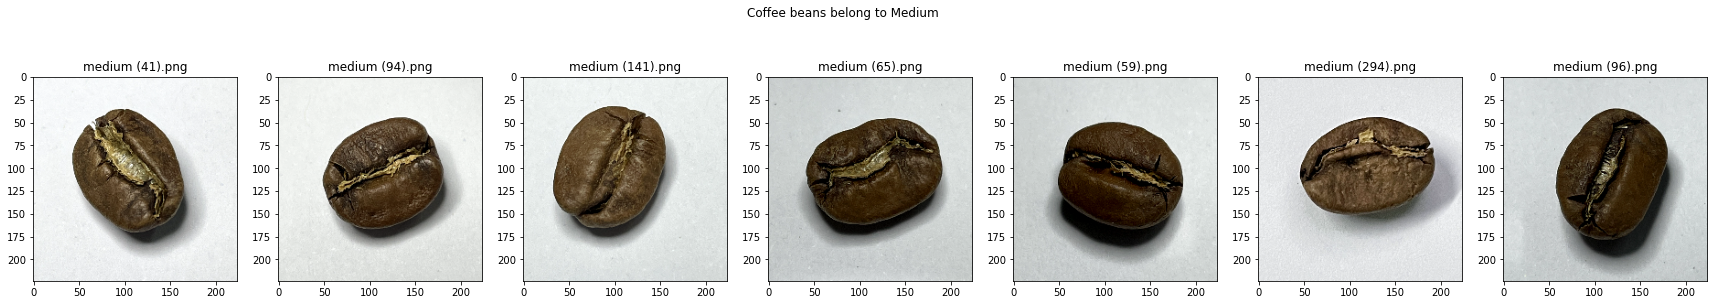

In [6]:
plot_sample_images(train_path, no_of_samples = 7, figsize = (30, 5))

### Sample images from test set

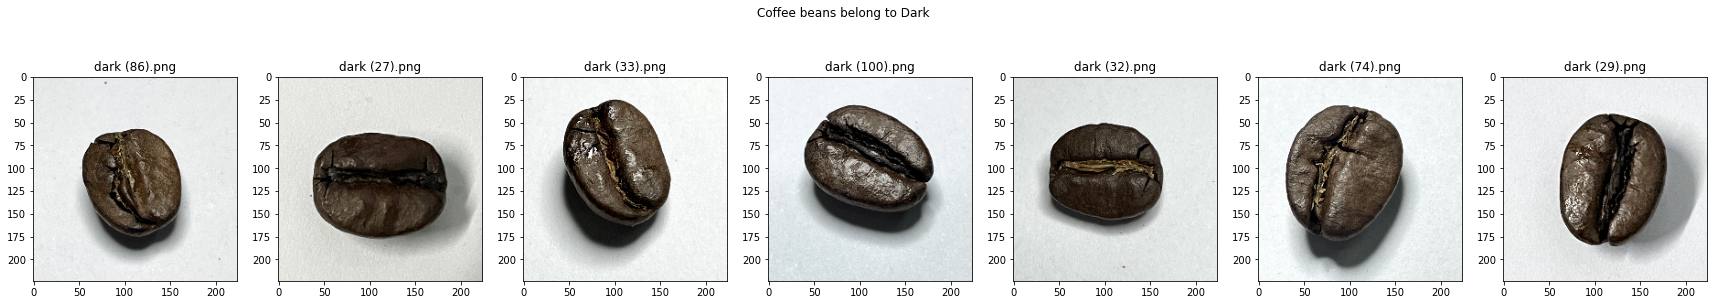

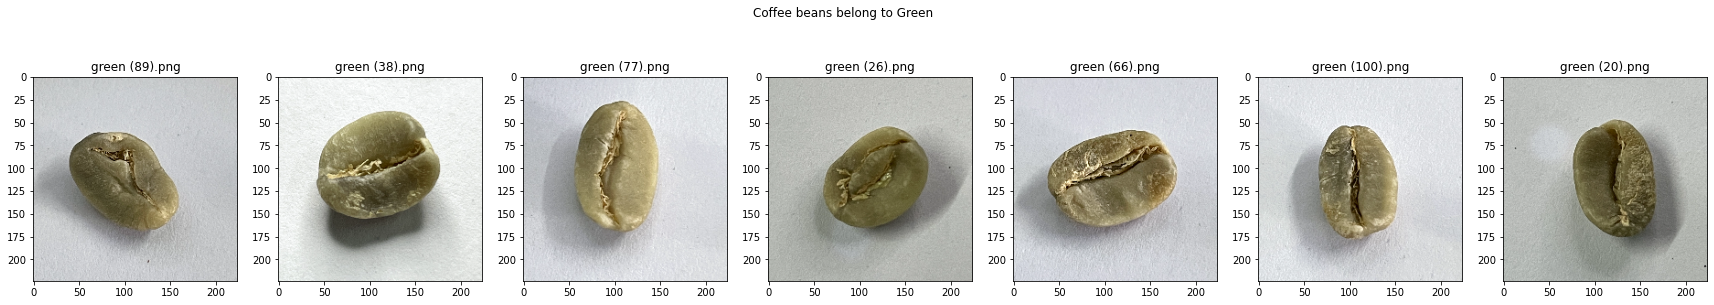

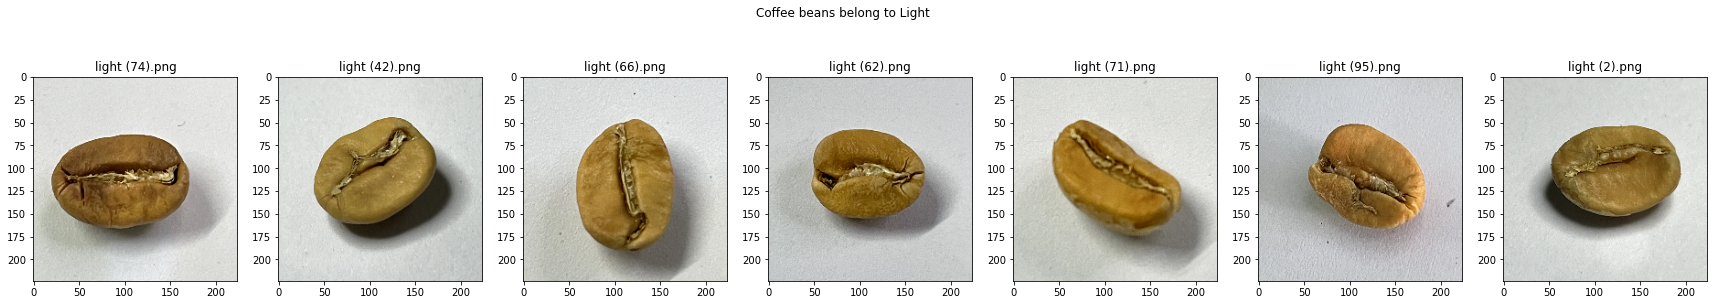

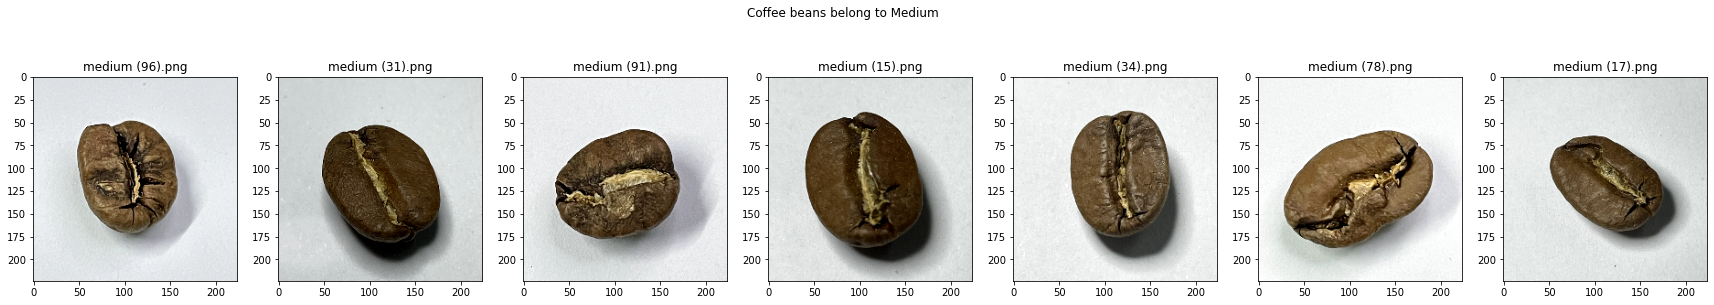

In [7]:
plot_sample_images(test_path, no_of_samples = 7, figsize = (30, 5))

## Keeping every picture in same dimension

In [8]:
def check_dimension(folder_path):
    
    # To save the dimesions of all images
    dim1 = []
    dim2 = []

    for folder_name in os.listdir(folder_path):
        for image in os.listdir(folder_path + '\\' + folder_name):
            
            # Reading each image from the path
            img = plt.imread(folder_path + '\\' + folder_name + '\\' + image)
            
            # Getting the dimensions of each image and storing them in lists
            d1, d2, _ = img.shape

            dim1.append(d1)
            dim2.append(d2)

    sns.jointplot(x = dim1, y = dim2)

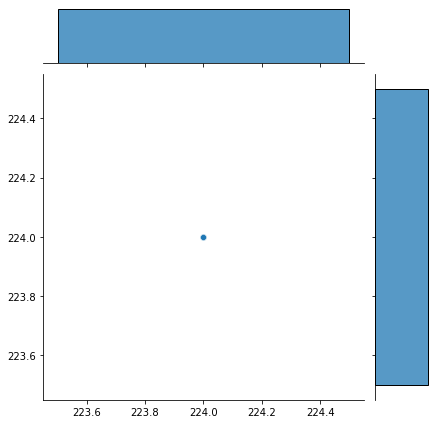

In [9]:
check_dimension(train_path)

**The above joint plot indcates that, all images are having same dimensions i.e., 224 x 224.**

In [10]:
image_shape = (224, 224, 3)

# Data Preprocessing

In [11]:
image_generator = ImageDataGenerator(rotation_range = 20, width_shift_range = 0.1, height_shift_range = 0.1,
                               shear_range = 0.1, zoom_range = 0.1, horizontal_flip = True,
                               fill_mode = 'nearest')

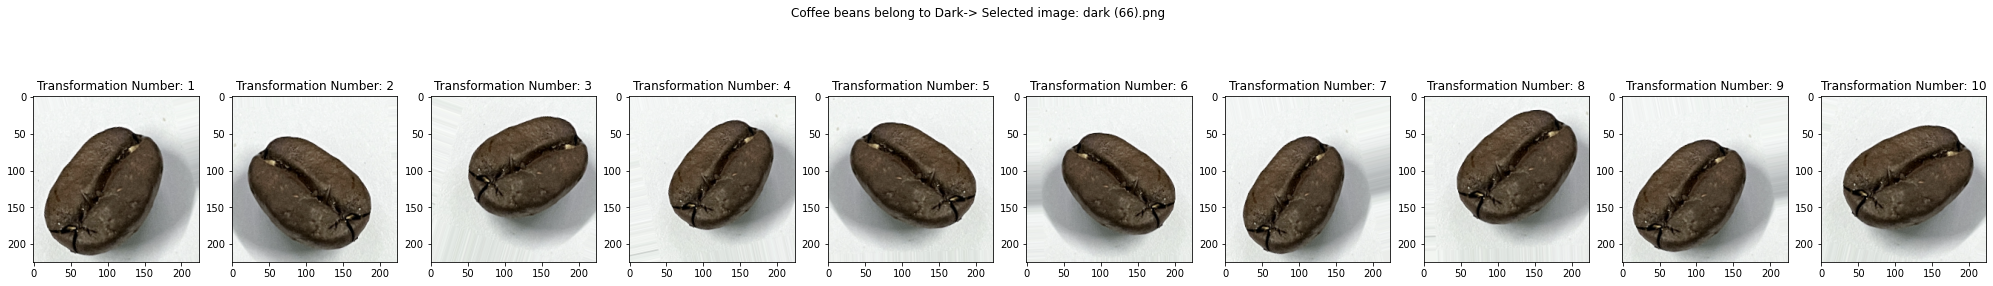

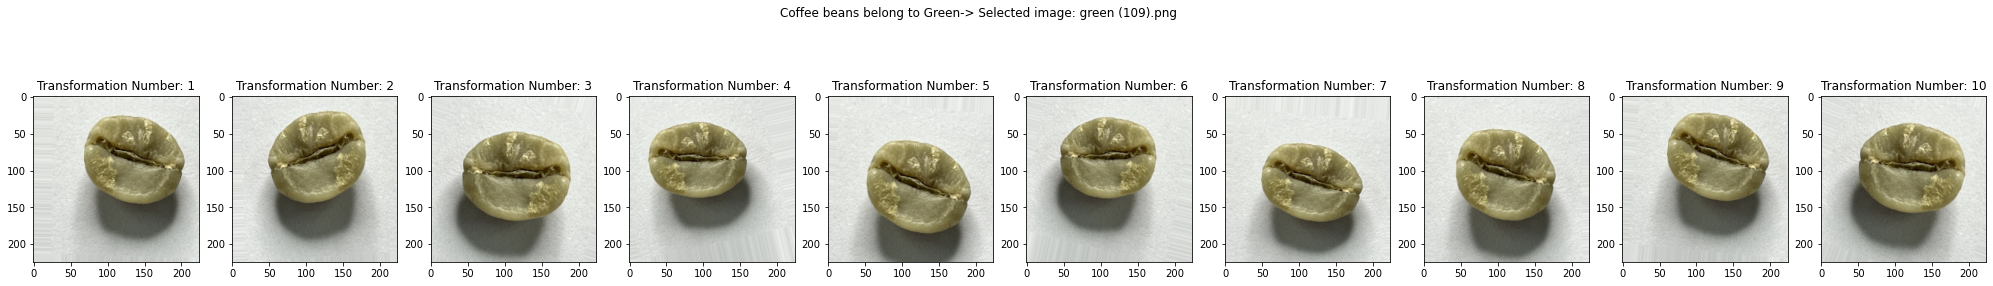

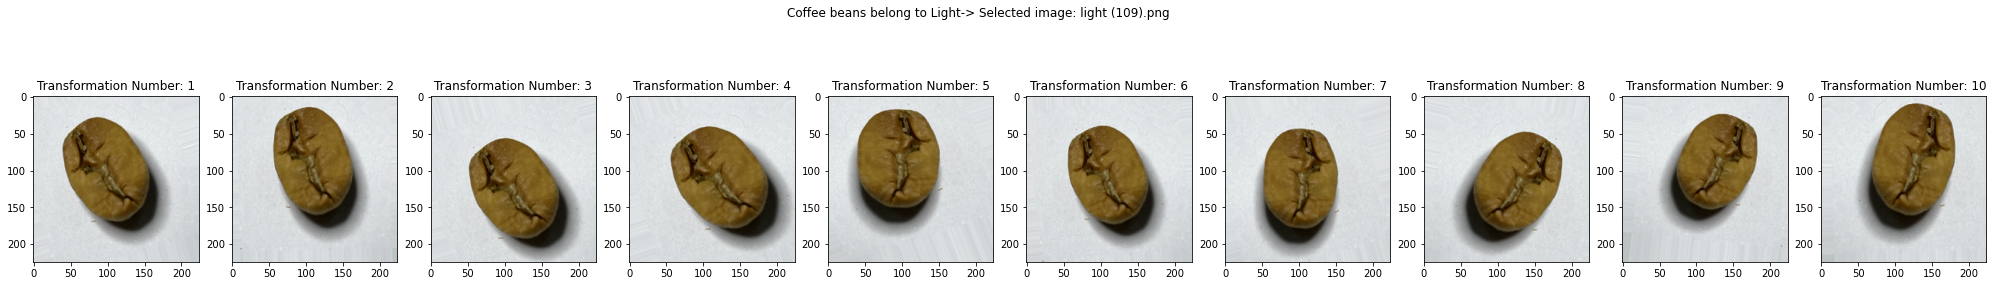

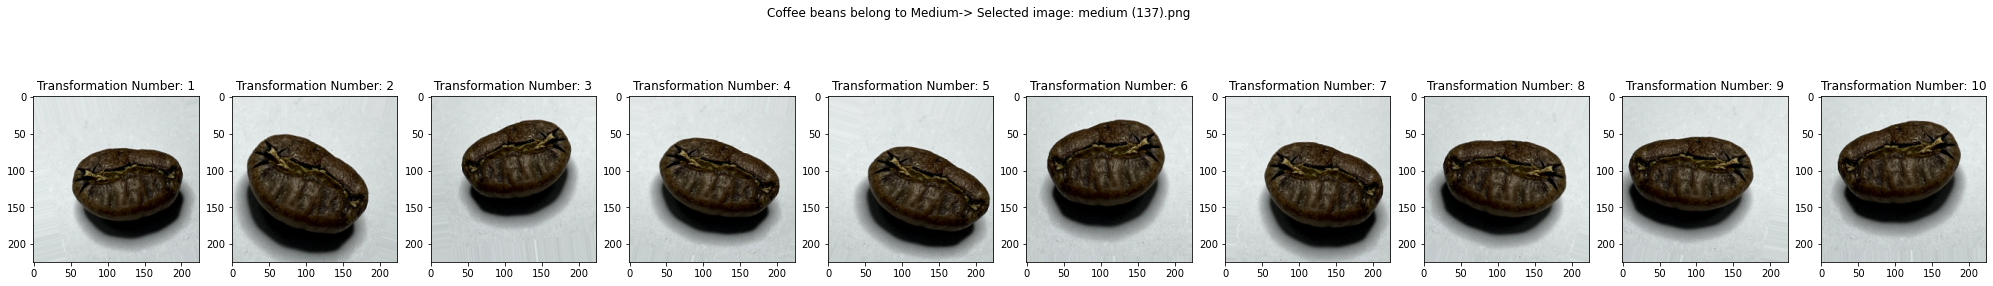

In [12]:
def data_transformation_images(folder_path, image_gen_object, no_of_samples = 5, figsize = (35, 5)):
    
    # Folder names are stored here
    folder_names = os.listdir(folder_path)
    
    # Iterating through each folder
    for folder_name in folder_names:
        images_path = folder_path + '\\' + folder_name
        
         # Making a subplot for each folder and pulling specified number of images. (Number of images you want to look and figsize can be defined by user as well)
        fig, ax = plt.subplots(1, no_of_samples, figsize = figsize)
        
        # Taking 1 random image from all images
        random_image_name = random.choice(os.listdir(folder_path + '\\' + folder_name))
        random_image = plt.imread(folder_path + '\\' + folder_name + '\\' + random_image_name)
        
        plt.suptitle("Coffee beans belong to " + folder_name + '-> ' + 'Selected image: ' + random_image_name)
        # Applying n number of transformations to single randomly selected image and plotting them. 
        for image_num in range(no_of_samples):
            ax[image_num].imshow(image_generator.random_transform(random_image))
            ax[image_num].set_title('Transformation Number: {}'.format(image_num + 1))
        
data_transformation_images(train_path, image_generator, no_of_samples = 10)

## Number of classes

In [13]:
image_generator.flow_from_directory(train_path)
image_generator.flow_from_directory(test_path)

Found 1200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


# Creating the Model

In [14]:
# CREATING THE MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

model = Sequential()

# The larger the image size and more complex the task, the more conv layers we should add.
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [15]:
batch_size = 32

train_image_gen = image_generator.flow_from_directory(train_path, target_size = image_shape[:2], 
                                                color_mode = 'rgb', batch_size = batch_size,
                                                class_mode = 'categorical')

# Make sure to make Shuffle = False
test_image_gen = image_generator.flow_from_directory(test_path, target_size = image_shape[:2], 
                                                color_mode = 'rgb', batch_size = batch_size,
                                                class_mode = 'categorical', shuffle = False)

train_image_gen.class_indices

results = model.fit(train_image_gen, epochs = 20, validation_data = test_image_gen)

Found 1200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
Epoch 1/20
38/38 [==============================] - 20s 447ms/step - loss: 99.7079 - accuracy: 0.4200 - val_loss: 0.7679 - val_accuracy: 0.6350
Epoch 2/20
38/38 [==============================] - 17s 442ms/step - loss: 0.8257 - accuracy: 0.6908 - val_loss: 0.5919 - val_accuracy: 0.8125
Epoch 3/20
38/38 [==============================] - 17s 446ms/step - loss: 0.5223 - accuracy: 0.8300 - val_loss: 0.3910 - val_accuracy: 0.9050
Epoch 4/20
38/38 [==============================] - 17s 437ms/step - loss: 0.4649 - accuracy: 0.8683 - val_loss: 0.4714 - val_accuracy: 0.8550
Epoch 5/20
38/38 [==============================] - 17s 444ms/step - loss: 0.4071 - accuracy: 0.8700 - val_loss: 0.2872 - val_accuracy: 0.9250
Epoch 6/20
38/38 [==============================] - 17s 438ms/step - loss: 0.3187 - accuracy: 0.8992 - val_loss: 0.2145 - val_accuracy: 0.9550
Epoch 7/20
38/38 [==============================] - 17s 44

# Saving the Model

In [25]:
# model.save('model_train0_9767_test0_97.h5')

# Model Evaluation

<Figure size 864x720 with 0 Axes>

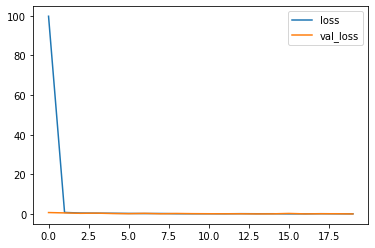

In [17]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(12, 10))
losses[['loss', 'val_loss']].plot()

plt.show()

<Figure size 864x720 with 0 Axes>

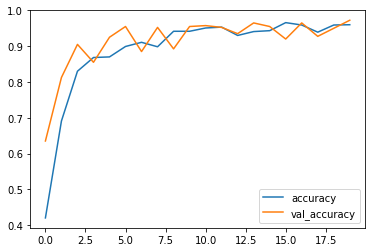

In [18]:
plt.figure(figsize=(12, 10))
losses[['accuracy', 'val_accuracy']].plot()

plt.show()

# Predictions

In [19]:
pred = model.predict(test_image_gen) # gives probabilites
predictions = np.argmax(pred, axis = -1)

13/13 [==============================] - 4s 307ms/step


In [20]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       100
           1       1.00      0.98      0.99       100
           2       0.98      1.00      0.99       100
           3       0.97      0.93      0.95       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [22]:
confusion_matrix(test_image_gen.classes, predictions)

array([[ 98,   0,   0,   2],
       [  0,  98,   1,   1],
       [  0,   0, 100,   0],
       [  6,   0,   1,  93]], dtype=int64)

# Scoring New Data

In [23]:
def score_new_data(image_path, model, image_shape, view_loaded_image = False):
    
    # Showing the image
    if view_loaded_image:
        plt.imshow(image.load_img(test_image))
    
    # Resizing the image
    resized_image = image.load_img(image_path, target_size = image_shape)
    
    # Converting the image to array
    test_image_array = image.img_to_array(resized_image)
    
    # We need to change to shape to (batch_size, pixel, pixel, color_channel)
    test_image_array = np.expand_dims(test_image_array, axis = 0)
    
    # Model Prediction
    prediction = np.argmax(model.predict(test_image_array), axis = -1)[0]
    
    # Returning the class of the model
    class_dict = train_image_gen.class_indices
    
    # Searching for the class and returning the class name
    for key, value in class_dict.items():
        if value == prediction:
            return key

1/1 [==============================] - 0s 417ms/step


'Dark'

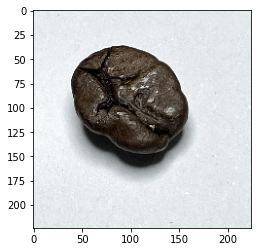

In [24]:
random_folder = random.choice(os.listdir(train_path))
random_image = random.choice(os.listdir(train_path + '\\' + random_folder + '\\'))

test_image = train_path + '\\' + random_folder + '\\' + random_image

score_new_data(image_path = test_image, model = model, image_shape = image_shape, view_loaded_image=True)